In [6]:
import os
import xml.etree.ElementTree as ET

annotations_dir = r'C:\Users\kaushal\Pictures\New folder (2)'


In [7]:
for filename in os.listdir(annotations_dir):
    if filename.endswith('.xml'):
        xml_path = os.path.join(annotations_dir, filename)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        for obj in root.findall('object'):
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)

        


In [8]:
import cv2
import os

image_dir = r'C:\Users\kaushal\Pictures\New folder'
images = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        images.append(image)


In [4]:

target_size = (224, 224)
images_resized = [cv2.resize(image, target_size) for image in images]

# Normalize pixel values to a range of [0, 1]
images_normalized = [image.astype('float32') / 255.0 for image in images_resized]


For crop the images

In [10]:
import cv2
import os

# Define the path to your dataset
dataset_dir = r'C:\Users\kaushal\Pictures\New folder\n02090622-borzoi'

# Define the target size (100x100 pixels)
target_size = (100, 100)

# Create a directory to store the resized images
output_dir = r'C:\Users\kaushal\Pictures\cropped'
os.makedirs(output_dir, exist_ok=True)

# Iterate through the images in your dataset
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):  # Adjust the file extension as needed
        image_path = os.path.join(dataset_dir, filename)
        
        # Read the image
        image = cv2.imread(image_path)

        # Crop and resize the image
        height, width, _ = image.shape
        min_dim = min(height, width)
        x_start = (width - min_dim) // 2
        y_start = (height - min_dim) // 2
        cropped_image = image[y_start:y_start + min_dim, x_start:x_start + min_dim]
        resized_image = cv2.resize(cropped_image, target_size)

        # Define the output path and save the resized image
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)


In [1]:
import cv2
import os

dataset_dir = r'C:\Users\kaushal\Pictures\New folder\n02101388-Brittany_spaniel'

target_size = (100, 100)

output_dir = r'C:\Users\kaushal\Pictures\cropped 2'
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'): 
        image_path = os.path.join(dataset_dir, filename)
        
        image = cv2.imread(image_path)

        height, width, _ = image.shape
        min_dim = min(height, width)
        x_start = (width - min_dim) // 2
        y_start = (height - min_dim) // 2
        cropped_image = image[y_start:y_start + min_dim, x_start:x_start + min_dim]
        resized_image = cv2.resize(cropped_image, target_size)

        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)


In [3]:
import cv2
import os

dataset_dir = r'C:\Users\kaushal\Pictures\New folder\n02105505-komondor'

target_size = (100, 100)

output_dir = r'C:\Users\kaushal\Pictures\cropped 3'
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'): 
        image_path = os.path.join(dataset_dir, filename)
        
        image = cv2.imread(image_path)

        height, width, _ = image.shape
        min_dim = min(height, width)
        x_start = (width - min_dim) // 2
        y_start = (height - min_dim) // 2
        cropped_image = image[y_start:y_start + min_dim, x_start:x_start + min_dim]
        resized_image = cv2.resize(cropped_image, target_size)

        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)


In [4]:
import cv2
import os

dataset_dir = r'C:\Users\kaushal\Pictures\New folder\n02107142-Doberman'

target_size = (100, 100)

output_dir = r'C:\Users\kaushal\Pictures\cropped 4'
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'): 
        image_path = os.path.join(dataset_dir, filename)
        
        image = cv2.imread(image_path)

        height, width, _ = image.shape
        min_dim = min(height, width)
        x_start = (width - min_dim) // 2
        y_start = (height - min_dim) // 2
        cropped_image = image[y_start:y_start + min_dim, x_start:x_start + min_dim]
        resized_image = cv2.resize(cropped_image, target_size)

        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)


For Histogram Equalization

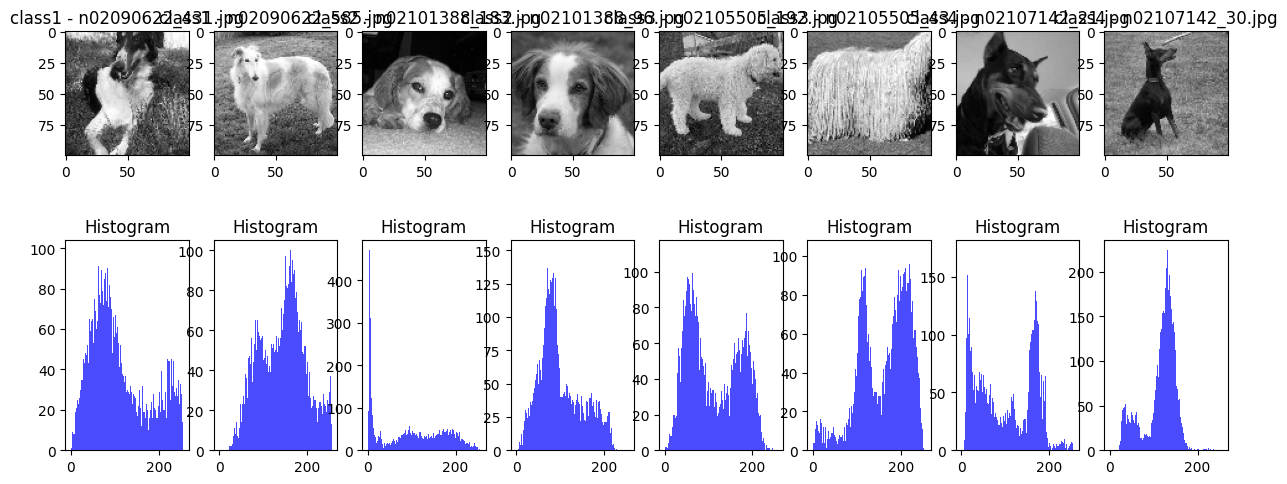

In [18]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

base_path = r'C:\Users\kaushal\Pictures\New folder (4)'

classes = ['class1', 'class2', 'class3', 'class4']

num_images_per_class = 2

grayscale_images = []
image_titles = []

for class_name in classes:
    class_path = os.path.join(base_path, class_name)

    image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path)[:num_images_per_class] if f.endswith(('.jpg', '.jpeg', '.png'))]

    for path in image_paths:
        image = cv2.imread(path)
        
        grayscale_image = convert_to_grayscale(image)
        
        grayscale_images.append(grayscale_image)
        image_titles.append(f"{class_name} - {os.path.basename(path)}")

fig, axs = plt.subplots(num_images_per_class, len(classes) * num_images_per_class, figsize=(15, 6))

for i, (image, title) in enumerate(zip(grayscale_images, image_titles)):
    axs[0, i].imshow(image, cmap='gray')
    axs[0, i].set_title(title)
    axs[1, i].hist(image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    axs[1, i].set_title('Histogram')

plt.show()


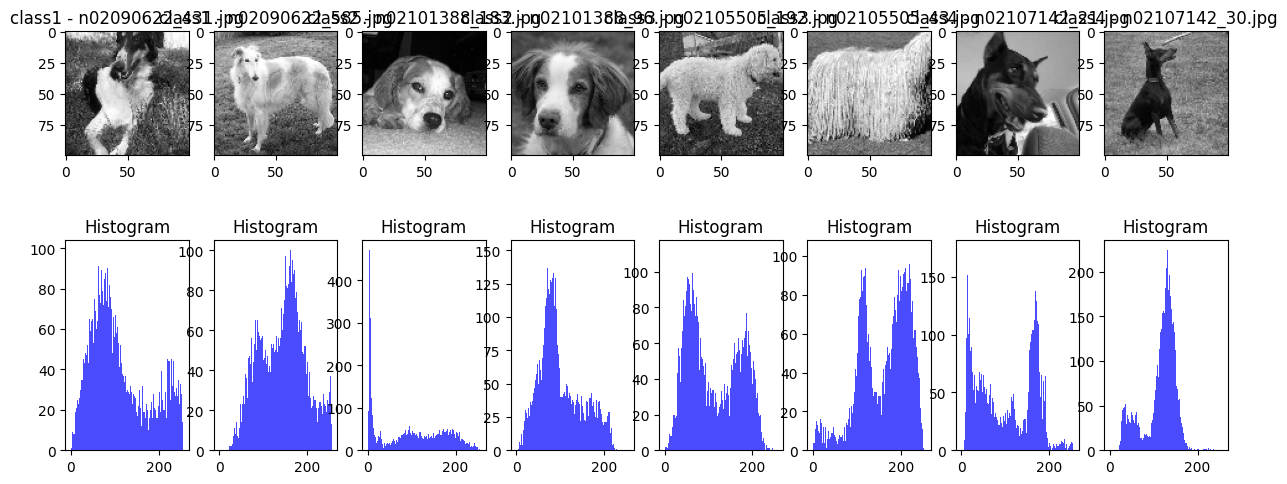

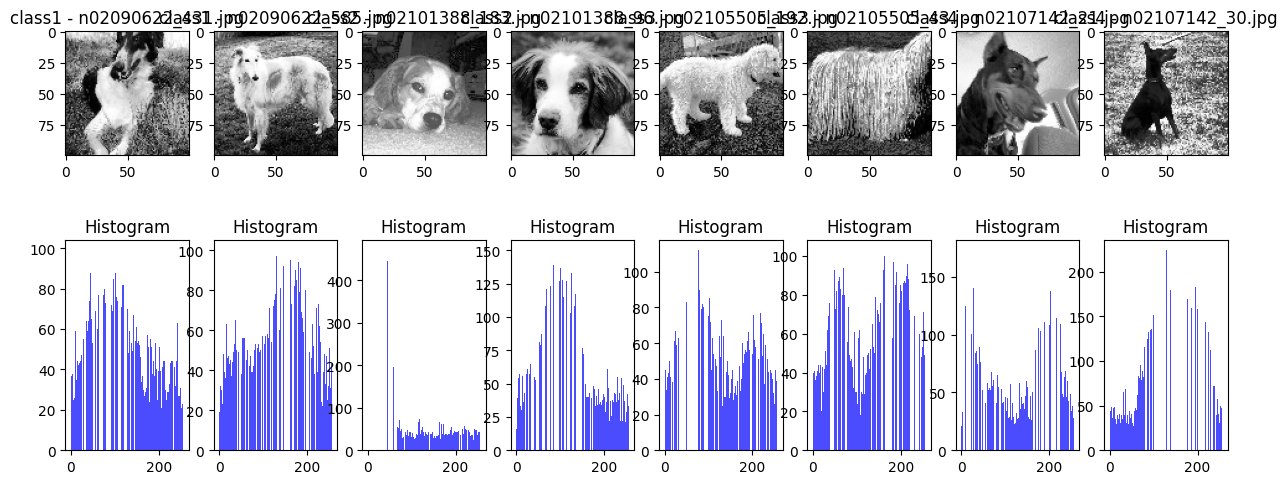

In [19]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

def plot_images_and_histograms(images, titles):
    fig, axs = plt.subplots(2, len(images), figsize=(15, 6))

    for i, (img, title) in enumerate(zip(images, titles)):
        axs[0, i].imshow(img, cmap='gray')
        axs[0, i].set_title(title)
        axs[1, i].hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
        axs[1, i].set_title('Histogram')

    plt.show()

base_path = r'C:\Users\kaushal\Pictures\New folder (4)'

classes = ['class1', 'class2', 'class3', 'class4']

num_images_per_class = 2

grayscale_images = []
equalized_images = []
image_titles = []

for class_name in classes:
    class_path = os.path.join(base_path, class_name)

    image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path)[:num_images_per_class] if f.endswith(('.jpg', '.jpeg', '.png'))]

    for path in image_paths:
        image = cv2.imread(path)
        
        grayscale_image = convert_to_grayscale(image)
        
        equalized_image = histogram_equalization(grayscale_image)
        
        grayscale_images.append(grayscale_image)
        equalized_images.append(equalized_image)
        image_titles.append(f"{class_name} - {os.path.basename(path)}")

plot_images_and_histograms(grayscale_images, image_titles)

plot_images_and_histograms(equalized_images, image_titles)


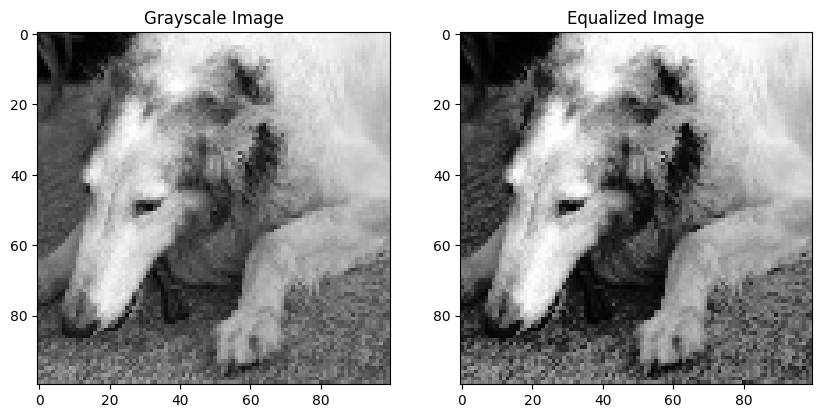

In [8]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

def plot_side_by_side(image1, image2, title1, title2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(image1, cmap='gray')
    axs[0].set_title(title1)

    axs[1].imshow(image2, cmap='gray')
    axs[1].set_title(title2)

    plt.show()

base_path = r'C:\Users\kaushal\Pictures\New folder (5)'

classes = ['class1', 'class2', 'class3', 'class4']

num_images_per_class = 2

class_name = classes[0]
class_path = os.path.join(base_path, class_name)
image_path = [os.path.join(class_path, f) for f in os.listdir(class_path)[:1] if f.endswith(('.jpg', '.jpeg', '.png'))][0]

original_image = cv2.imread(image_path)
grayscale_image = convert_to_grayscale(original_image)
equalized_image = histogram_equalization(grayscale_image)

plot_side_by_side(grayscale_image, equalized_image, 'Grayscale Image', 'Equalized Image')


After getting the output i can observe that the equalized image has more number of pixels in it and the pixels are spreaded throuth the whole image resulting the improvement of visibilty of image.

For RGB Histogram

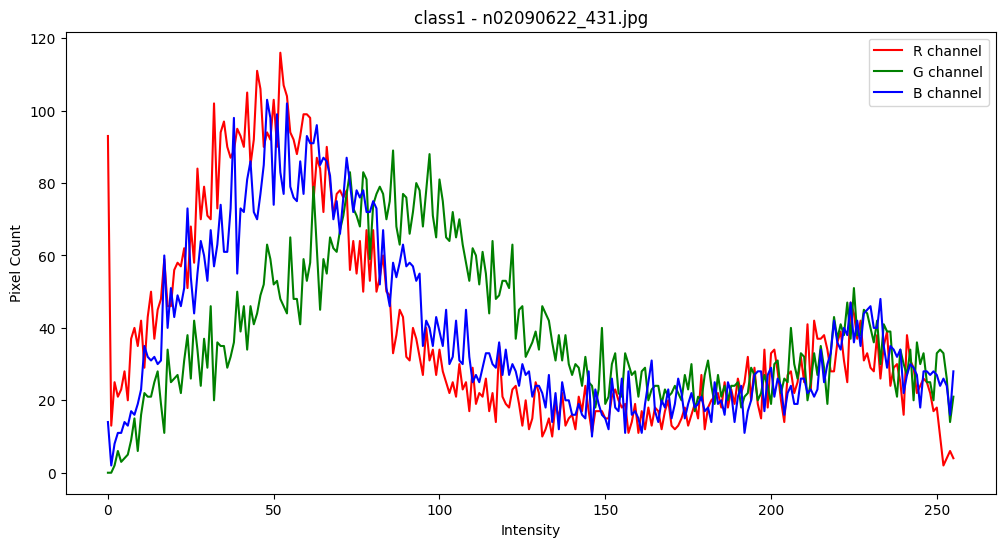

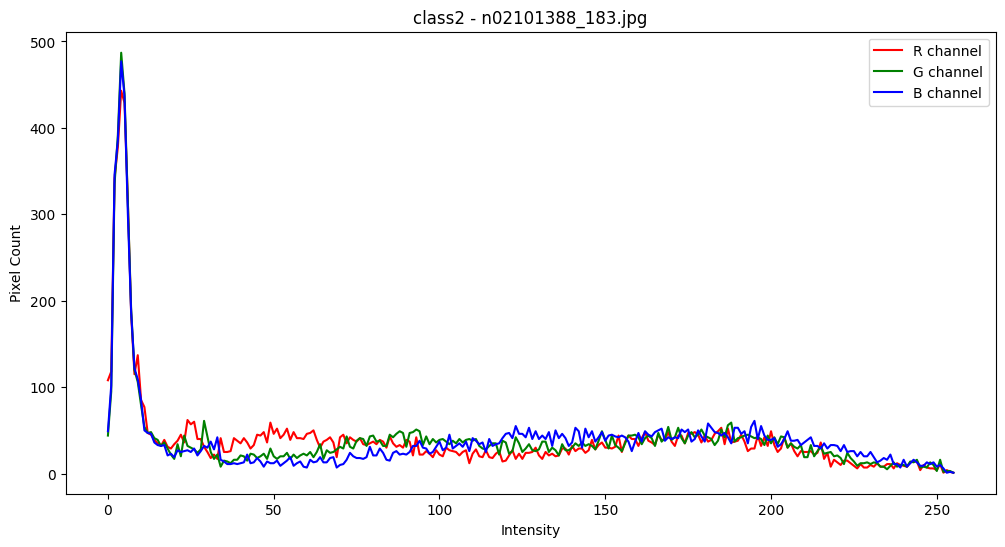

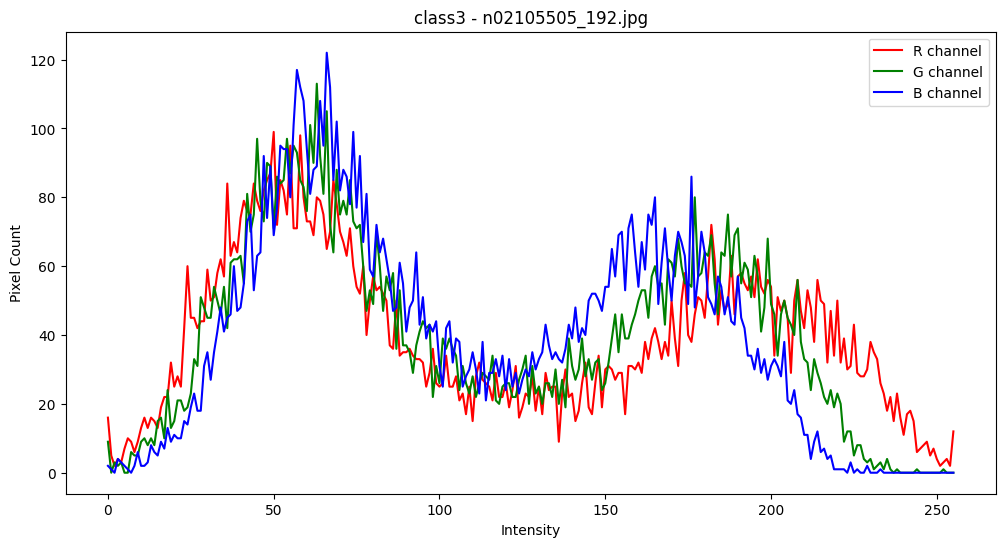

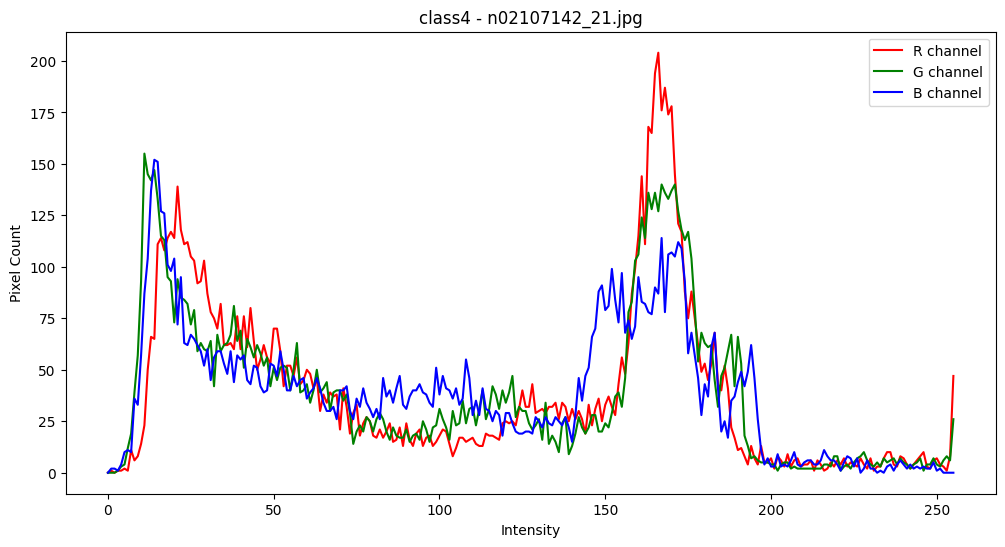

In [24]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def plot_rgb_histogram(image, title):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(12, 6))

    for i, color in enumerate(colors):
        histogram, bin_edges = np.histogram(image[:, :, i], bins=256, range=[0, 256])
        plt.plot(bin_edges[0:-1], histogram, color=color, label=f'{color.upper()} channel')

    plt.title(title)
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
    plt.legend()
    plt.show()

base_path = r'C:\Users\kaushal\Pictures\New folder (4)'

classes = ['class1', 'class2', 'class3', 'class4']

num_images_per_class = 1

for class_name in classes:
    class_path = os.path.join(base_path, class_name)

    image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path)[:num_images_per_class] if f.endswith(('.jpg', '.jpeg', '.png'))]

    for path in image_paths:
        image = cv2.imread(path)


        plot_rgb_histogram(image, f'{class_name} - {os.path.basename(path)}')


For Histogram Comparison

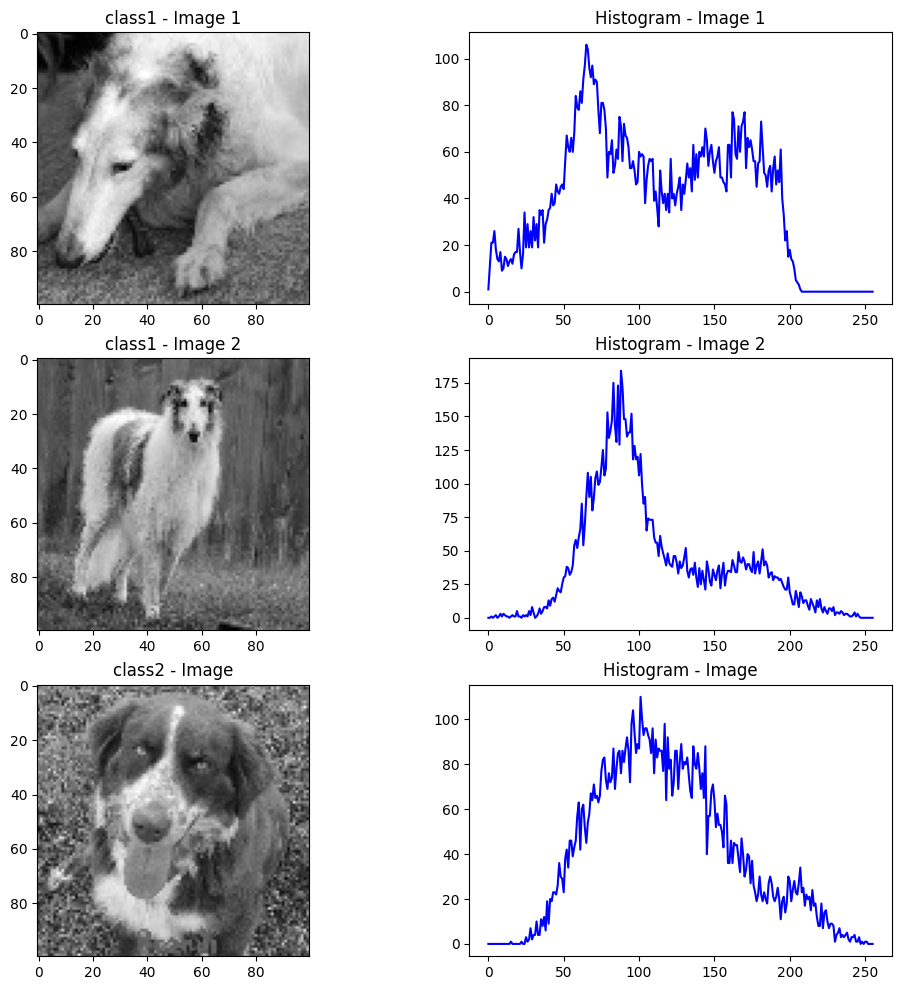

In [25]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def compute_histogram(image):
    histogram, _ = np.histogram(image.ravel(), bins=256, range=[0, 256])
    return histogram

base_path = r'C:\Users\kaushal\Pictures\New folder (5)'

classes = ['class1', 'class2', 'class3', 'class4']

class_name_same = classes[0]
class_path_same = os.path.join(base_path, class_name_same)
image_paths_same = [os.path.join(class_path_same, f) for f in os.listdir(class_path_same)[:2] if f.endswith(('.jpg', '.jpeg', '.png'))]

class_name_other = classes[1]
class_path_other = os.path.join(base_path, class_name_other)
image_paths_other = [os.path.join(class_path_other, f) for f in os.listdir(class_path_other)[:1] if f.endswith(('.jpg', '.jpeg', '.png'))]

image_same1 = cv2.imread(image_paths_same[0])
image_same2 = cv2.imread(image_paths_same[1])
image_other = cv2.imread(image_paths_other[0])

grayscale_same1 = convert_to_grayscale(image_same1)
grayscale_same2 = convert_to_grayscale(image_same2)
grayscale_other = convert_to_grayscale(image_other)

histogram_same1 = compute_histogram(grayscale_same1)
histogram_same2 = compute_histogram(grayscale_same2)
histogram_other = compute_histogram(grayscale_other)

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

axs[0, 0].imshow(grayscale_same1, cmap='gray')
axs[0, 0].set_title(f'{class_name_same} - Image 1')
axs[0, 1].plot(histogram_same1, color='blue')
axs[0, 1].set_title('Histogram - Image 1')

axs[1, 0].imshow(grayscale_same2, cmap='gray')
axs[1, 0].set_title(f'{class_name_same} - Image 2')
axs[1, 1].plot(histogram_same2, color='blue')
axs[1, 1].set_title('Histogram - Image 2')

axs[2, 0].imshow(grayscale_other, cmap='gray')
axs[2, 0].set_title(f'{class_name_other} - Image')
axs[2, 1].plot(histogram_other, color='blue')
axs[2, 1].set_title('Histogram - Image')

plt.show()


In [30]:
import cv2
import os
import numpy as np


def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def compute_histogram(image):
    histogram, _ = np.histogram(image.ravel(), bins=256, range=[0, 256])
    return histogram

def compute_distances(hist1, hist2):
    euclidean_distance = np.linalg.norm(hist1 - hist2)
    manhattan_distance = np.sum(np.abs(hist1 - hist2))
    bhattacharyya_distance = -np.log(np.sum(np.sqrt(hist1 * hist2)))

    intersection = np.minimum(hist1, hist2)
    intersection_distance = 1 - np.sum(intersection) / np.sum(np.minimum(hist1, hist2))

    return euclidean_distance, manhattan_distance, bhattacharyya_distance, intersection_distance

base_path = r'C:\Users\kaushal\Pictures\New folder (3)'

classes = ['class1', 'class2', 'class3', 'class4']

class_name_same = classes[0]
class_path_same = os.path.join(base_path, class_name_same)
image_paths_same = [os.path.join(class_path_same, f) for f in os.listdir(class_path_same)[:2] if f.endswith(('.jpg', '.jpeg', '.png'))]

class_name_diff1 = classes[1]
class_path_diff1 = os.path.join(base_path, class_name_diff1)
image_paths_diff1 = [os.path.join(class_path_diff1, f) for f in os.listdir(class_path_diff1)[:1] if f.endswith(('.jpg', '.jpeg', '.png'))]

class_name_diff2 = classes[2]
class_path_diff2 = os.path.join(base_path, class_name_diff2)
image_paths_diff2 = [os.path.join(class_path_diff2, f) for f in os.listdir(class_path_diff2)[:1] if f.endswith(('.jpg', '.jpeg', '.png'))]

image_same1 = cv2.imread(image_paths_same[0])
image_same2 = cv2.imread(image_paths_same[1])
image_diff1 = cv2.imread(image_paths_diff1[0])
image_diff2 = cv2.imread(image_paths_diff2[0])

grayscale_same1 = convert_to_grayscale(image_same1)
grayscale_same2 = convert_to_grayscale(image_same2)
grayscale_diff1 = convert_to_grayscale(image_diff1)
grayscale_diff2 = convert_to_grayscale(image_diff2)

hist_same1 = compute_histogram(grayscale_same1)
hist_same2 = compute_histogram(grayscale_same2)
hist_diff1 = compute_histogram(grayscale_diff1)
hist_diff2 = compute_histogram(grayscale_diff2)

euclidean_same, manhattan_same, bhattacharyya_same, intersection_same = compute_distances(hist_same1, hist_same2)
euclidean_diff, manhattan_diff, bhattacharyya_diff, intersection_diff = compute_distances(hist_diff1, hist_diff2)

print("Euclidean Distance:")
print(f"Same Class: {euclidean_same}")
print(f"Different Classes: {euclidean_diff}")

print("\nManhattan Distance:")
print(f"Same Class: {manhattan_same}")
print(f"Different Classes: {manhattan_diff}")

print("\nBhattacharyya Distance:")
print(f"Same Class: {bhattacharyya_same}")
print(f"Different Classes: {bhattacharyya_diff}")

print("\nHistogram Intersection:")
print(f"Same Class: {intersection_same}")
print(f"Different Classes: {intersection_diff}")


Euclidean Distance:
Same Class: 493.3112607674793
Different Classes: 601.494804632592

Manhattan Distance:
Same Class: 5114
Different Classes: 6772

Bhattacharyya Distance:
Same Class: -9.157390862231113
Different Classes: -9.099230324816187

Histogram Intersection:
Same Class: 0.0
Different Classes: 0.0


For Image Feature Descriptor

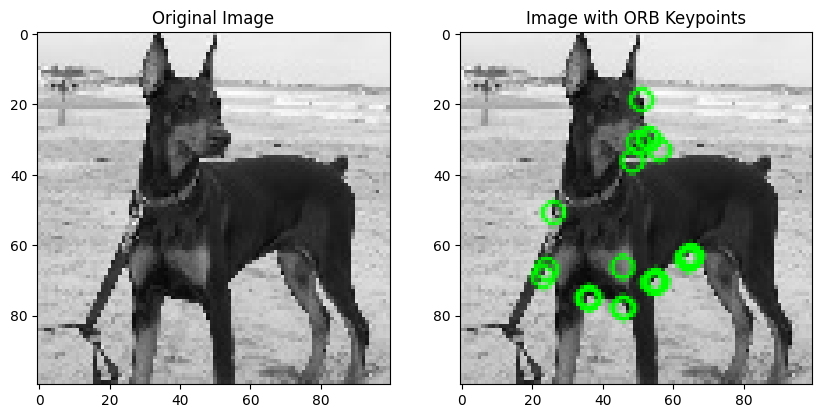

In [1]:
import cv2
import matplotlib.pyplot as plt

image_path = r'C:\Users\kaushal\Pictures\New folder (7)\class4\grayscale_n02107142_5517.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

orb = cv2.ORB_create(edgeThreshold=15, patchSize=30, nlevels=8, fastThreshold=20,
                     scaleFactor=1.2, WTA_K=2, scoreType=cv2.ORB_HARRIS_SCORE,
                     firstLevel=0, nfeatures=30)

kp = orb.detect(img, None)

img_with_keypoints = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with ORB Keypoints')
plt.show()


Number of keypoints extracted: 36
Edge threshold value: 15
PatchSize used: 30


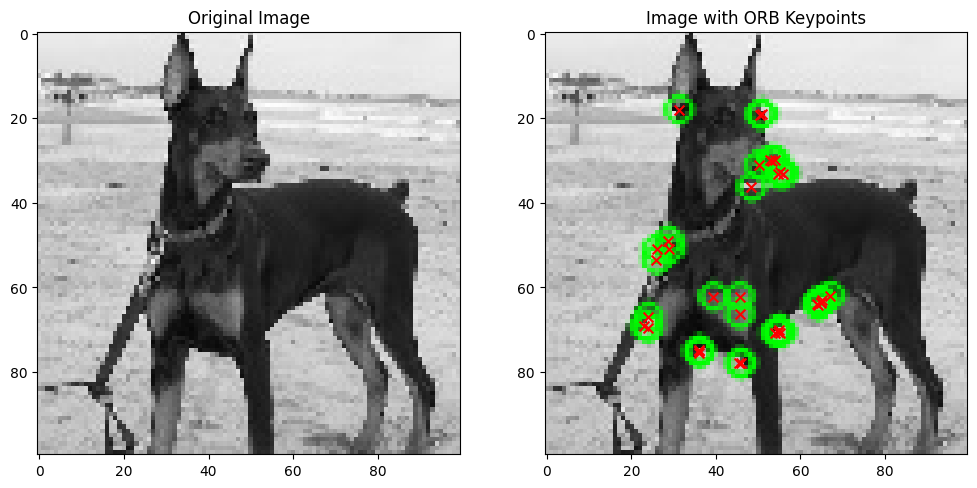

In [5]:
import cv2
import matplotlib.pyplot as plt

image_path = r'C:\Users\kaushal\Pictures\New folder (7)\class4\grayscale_n02107142_5517.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

edge_threshold = 15
patch_size = 30
nfeatures = 44
orb = cv2.ORB_create(edgeThreshold=edge_threshold, patchSize=patch_size,
                     nlevels=8, fastThreshold=20, scaleFactor=1.2, WTA_K=2,
                     scoreType=cv2.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=nfeatures)

kp = orb.detect(img, None)

img_with_keypoints = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))

print(f"Number of keypoints extracted: {len(kp)}")
print(f"Edge threshold value: {edge_threshold}")
print(f"PatchSize used: {patch_size}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with ORB Keypoints')
plt.scatter([p.pt[0] for p in kp], [p.pt[1] for p in kp], s=50, c='red', marker='x')  # Plot keypoints
plt.show()


For Dimensionality reduction

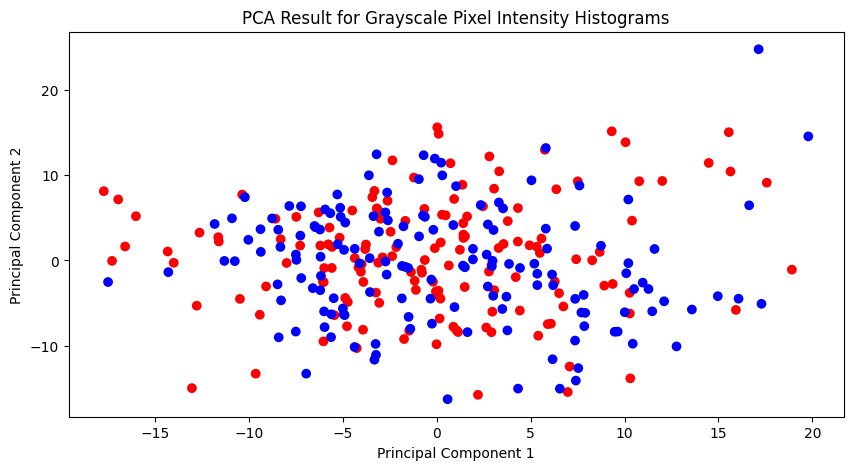

In [3]:
import cv2
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def compute_histogram(image):
    histogram, _ = np.histogram(image.ravel(), bins=256, range=[0, 256])
    return histogram

base_path = r'C:\Users\kaushal\Pictures\New folder (3)'

classes = ['class1', 'class2', 'class3', 'class4']

class_name1 = classes[0]
class_path1 = os.path.join(base_path, class_name1)
image_paths1 = [os.path.join(class_path1, f) for f in os.listdir(class_path1) if f.endswith(('.jpg', '.jpeg', '.png'))]

class_name2 = classes[1]
class_path2 = os.path.join(base_path, class_name2)
image_paths2 = [os.path.join(class_path2, f) for f in os.listdir(class_path2) if f.endswith(('.jpg', '.jpeg', '.png'))]

images1 = [cv2.imread(image_path, cv2.IMREAD_COLOR) for image_path in image_paths1]
images2 = [cv2.imread(image_path, cv2.IMREAD_COLOR) for image_path in image_paths2]

grayscale_images1 = [convert_to_grayscale(image) for image in images1]
grayscale_images2 = [convert_to_grayscale(image) for image in images2]

histograms1 = [compute_histogram(image) for image in grayscale_images1]
histograms2 = [compute_histogram(image) for image in grayscale_images2]

all_histograms = np.concatenate([histograms1, histograms2], axis=0)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(all_histograms)

num_components = 9
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(normalized_data)

plt.figure(figsize=(10, 5))
colors = ['red'] * len(histograms1) + ['blue'] * len(histograms2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors)
plt.title('PCA Result for Grayscale Pixel Intensity Histograms')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


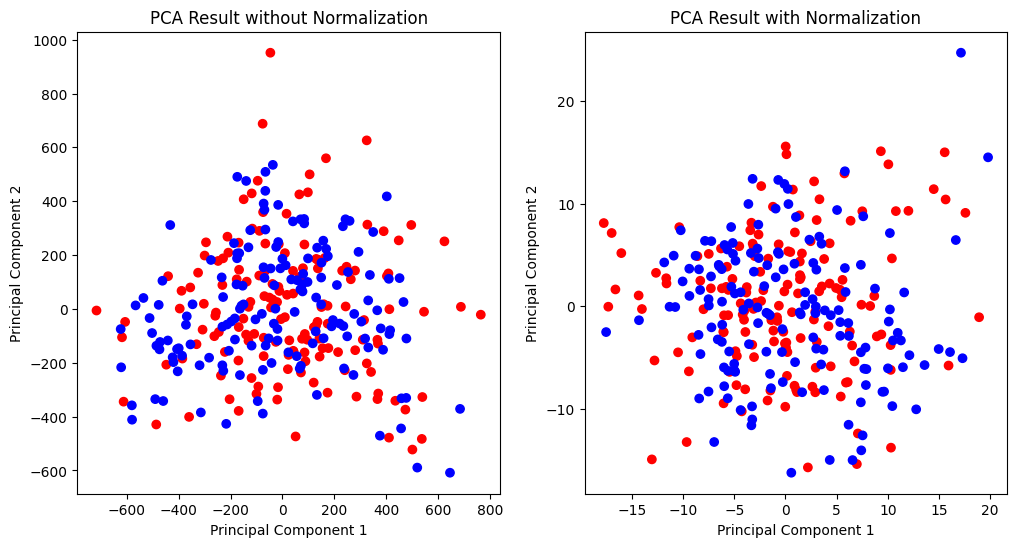

In [4]:
import cv2
import os
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def compute_histogram(image):
    histogram, _ = np.histogram(image.ravel(), bins=256, range=[0, 256])
    return histogram

base_path = r'C:\Users\kaushal\Pictures\New folder (3)'

classes = ['class1', 'class2', 'class3', 'class4']


class_name1 = classes[0]
class_path1 = os.path.join(base_path, class_name1)
image_paths1 = [os.path.join(class_path1, f) for f in os.listdir(class_path1) if f.endswith(('.jpg', '.jpeg', '.png'))]

class_name2 = classes[1]
class_path2 = os.path.join(base_path, class_name2)
image_paths2 = [os.path.join(class_path2, f) for f in os.listdir(class_path2) if f.endswith(('.jpg', '.jpeg', '.png'))]

images1 = [cv2.imread(image_path, cv2.IMREAD_COLOR) for image_path in image_paths1]
images2 = [cv2.imread(image_path, cv2.IMREAD_COLOR) for image_path in image_paths2]

grayscale_images1 = [convert_to_grayscale(image) for image in images1]
grayscale_images2 = [convert_to_grayscale(image) for image in images2]

histograms1 = [compute_histogram(image) for image in grayscale_images1]
histograms2 = [compute_histogram(image) for image in grayscale_images2]

all_histograms = np.concatenate([histograms1, histograms2], axis=0)

num_components_no_norm = 2
pca_no_norm = PCA(n_components=num_components_no_norm)
pca_result_no_norm = pca_no_norm.fit_transform(all_histograms)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(all_histograms)

num_components_with_norm = 2
pca_with_norm = PCA(n_components=num_components_with_norm)
pca_result_with_norm = pca_with_norm.fit_transform(normalized_data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
colors_no_norm = ['red'] * len(histograms1) + ['blue'] * len(histograms2)
plt.scatter(pca_result_no_norm[:, 0], pca_result_no_norm[:, 1], c=colors_no_norm)
plt.title('PCA Result without Normalization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
colors_with_norm = ['red'] * len(histograms1) + ['blue'] * len(histograms2)
plt.scatter(pca_result_with_norm[:, 0], pca_result_with_norm[:, 1], c=colors_with_norm)
plt.title('PCA Result with Normalization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


After getting the output of both normalized and without normalization i can observe that in without normalization the plots are overlapping with each other too much but in normalized result i can see that the plots are well seperated with each other so this class is separatable.